In [81]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('agg')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

%matplotlib inline

sns.set(style = 'whitegrid')

np.random.seed(42)

In [82]:
df = pd.read_csv('Fashion(Data Points) - Form responses 1.csv')

In [83]:
df.head()

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [84]:
df.shape

(150, 20)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

In [86]:
df.columns = df.columns.str.strip()

In [87]:
df.head(1)

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN


In [88]:
# renaming the column names
df = df.rename(columns={
    '1.Age Group': "Age Group",
    '2.Gender': 'Gender',
    '3.Profession': 'Profession',
    'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)': 'Style Preferences',
    '5. What’s your favorite color palette for clothing?':'Favourite colour',
    '6. Do you prioritize functionality or aesthetics in your outfits?': 'priority',
    '7.Which of these best describes your wardrobe?': 'wardrobe description',
    'Section 3: Shopping Habits\n8. How often do you shop for new clothes?': 'shopping habits',
    '9.What influences your clothing purchases the most?': 'influence',
    '10. Where do you typically shop for clothes? (Select all that apply)':'Shopping place',
    'Section 4: Lifestyle\n11. How often do you attend formal events?': 'lifestyle',
    '12.Do you often experiment with new styles or stick to what you know?': 'style experiments',
    '13. What kind of footwear do you wear most often?':'footwear_type',
    '14. How active is your daily lifestyle?': 'activity',
    'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices': 'personnel preferences',
    '16.If you had to choose, would you prefer timeless pieces or trendy items?':'trendy items selection',
    '17. From scale 1-10 how much do you think your clothing style reflects about your personality?': 'scaling'
})

In [89]:
df.head()

,Timestamp,Age Group,Gender,Profession,Style Preferences,Favourite colour,priority,wardrobe description,shopping habits,influence,Shopping place,lifestyle,style experiments,footwear_type,activity,personnel preferences,trendy items selection,scaling,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [90]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [91]:
df.isnull().sum()

,0
Timestamp,0
Age Group,0
Gender,0
Profession,0
Style Preferences,1
Favourite colour,0
priority,1
wardrobe description,2
shopping habits,1
influence,2


In [92]:
df.drop('Section 2: Style Preferences', axis = 1, inplace = True)
df.drop('Column 18', axis = 1, inplace = True)

In [93]:
df.dropna(inplace = True)

In [94]:
df.isnull().sum()

,0
Timestamp,0
Age Group,0
Gender,0
Profession,0
Style Preferences,0
Favourite colour,0
priority,0
wardrobe description,0
shopping habits,0
influence,0


In [95]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'float64')

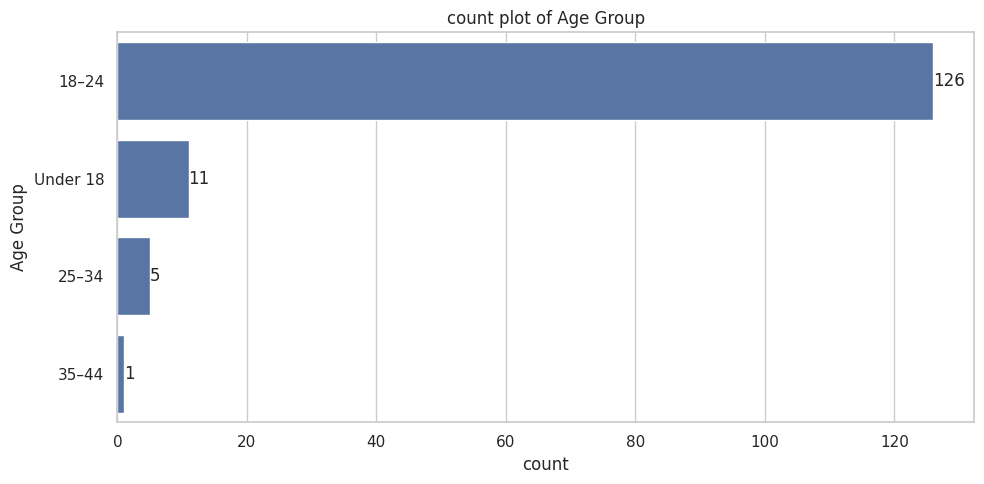

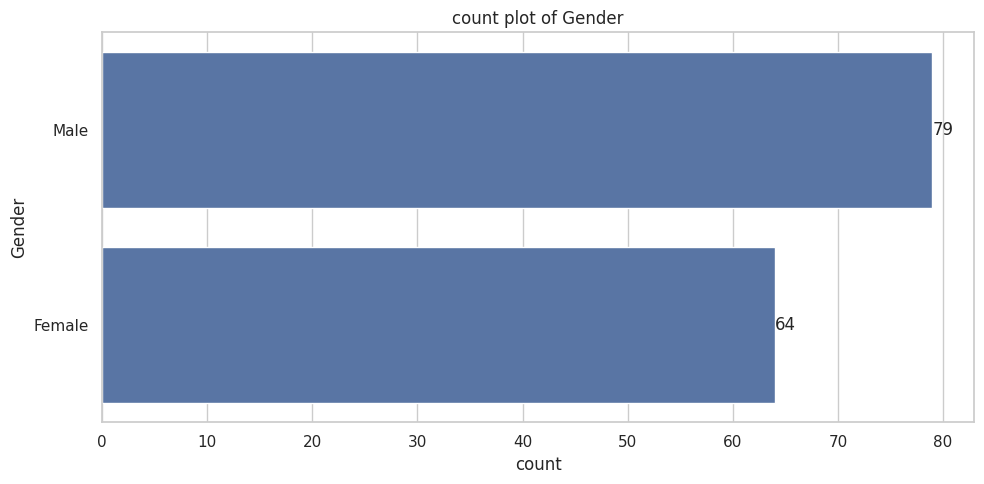

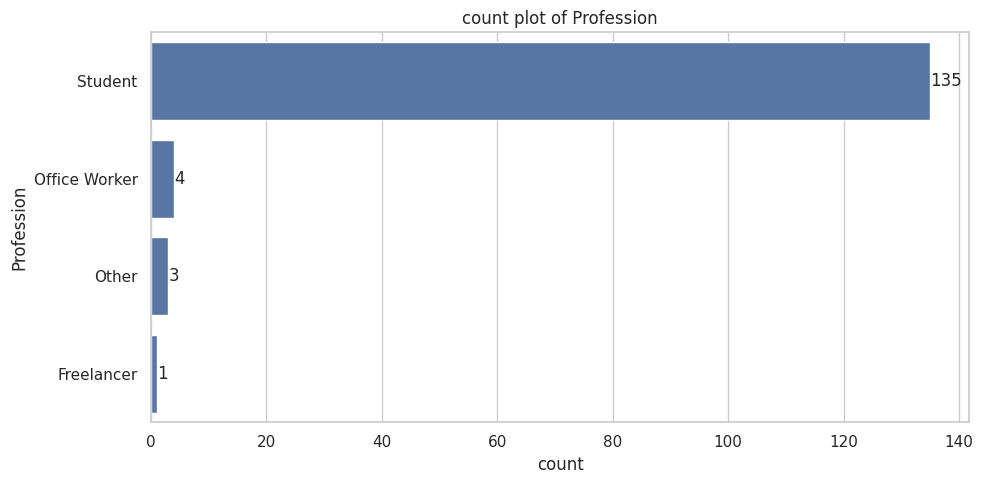

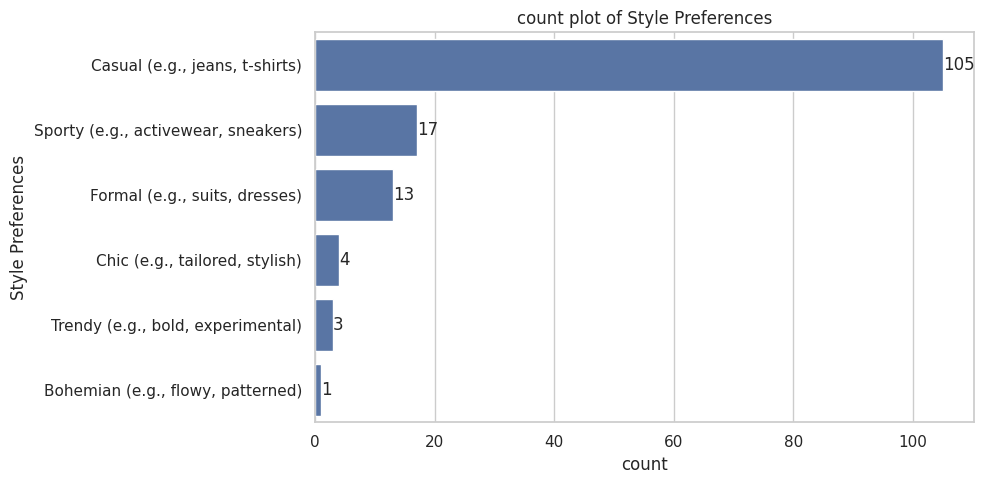

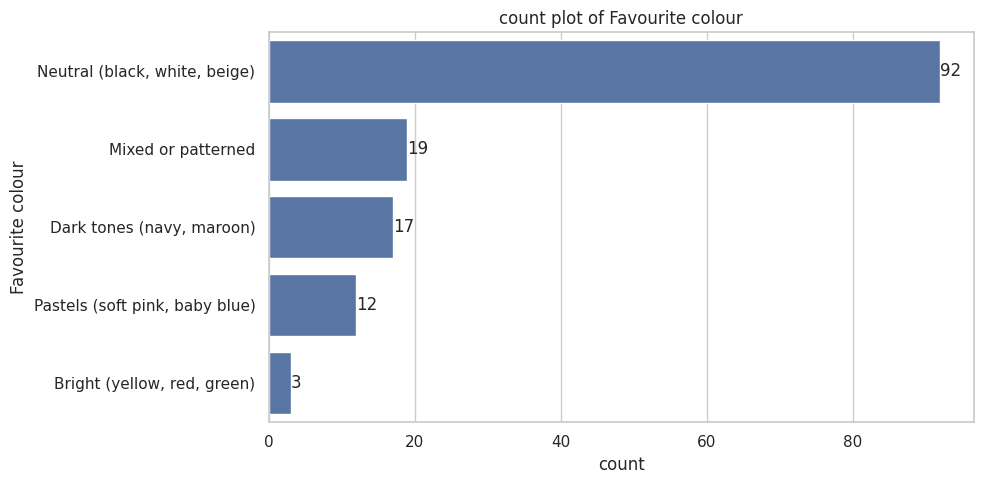

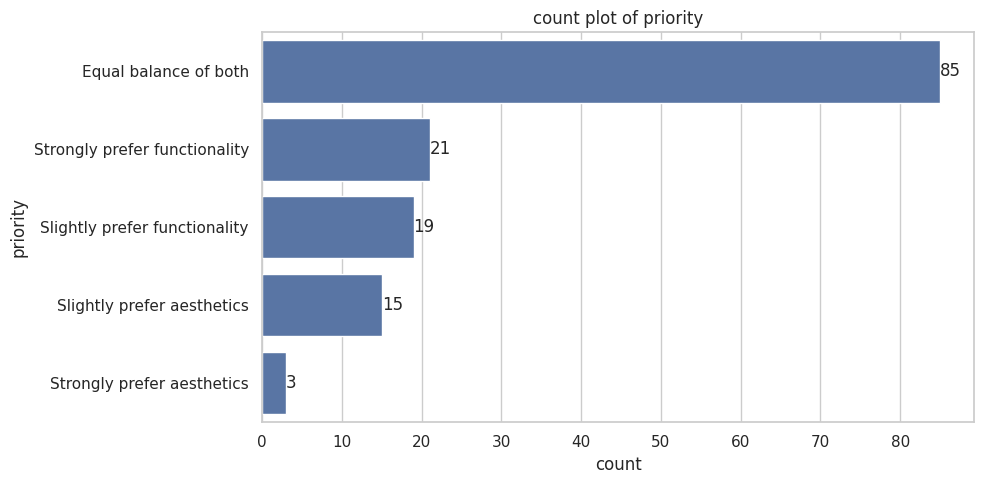

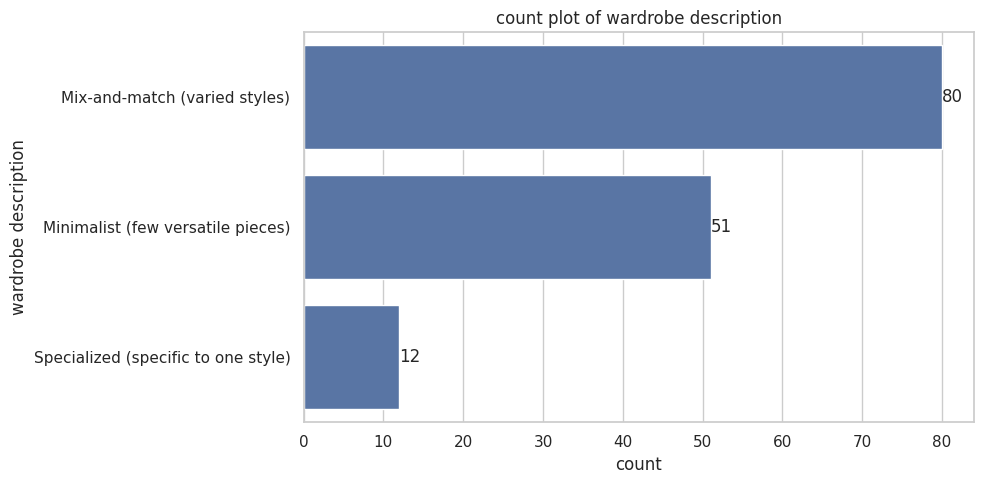

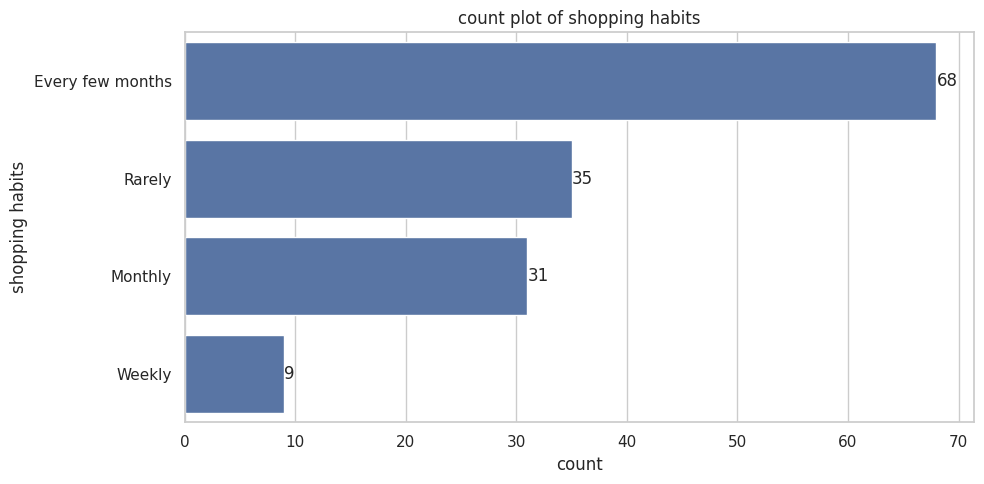

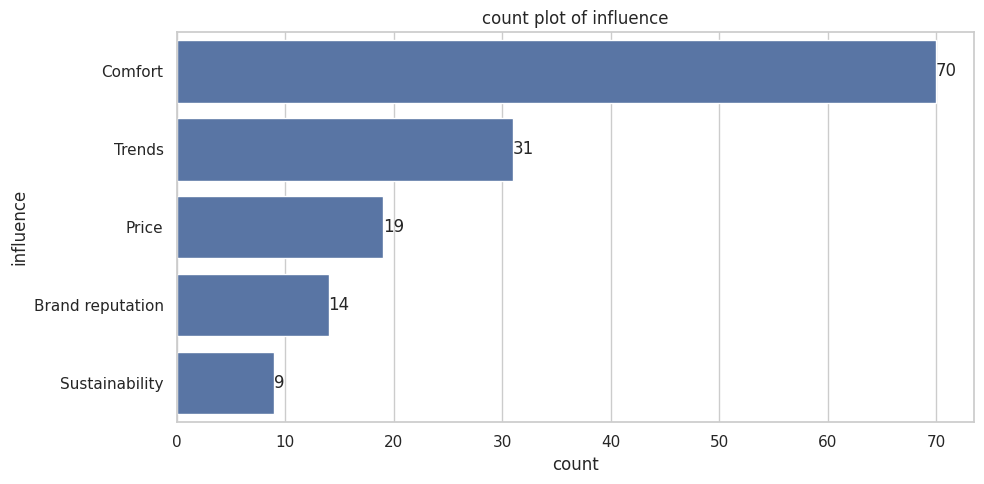

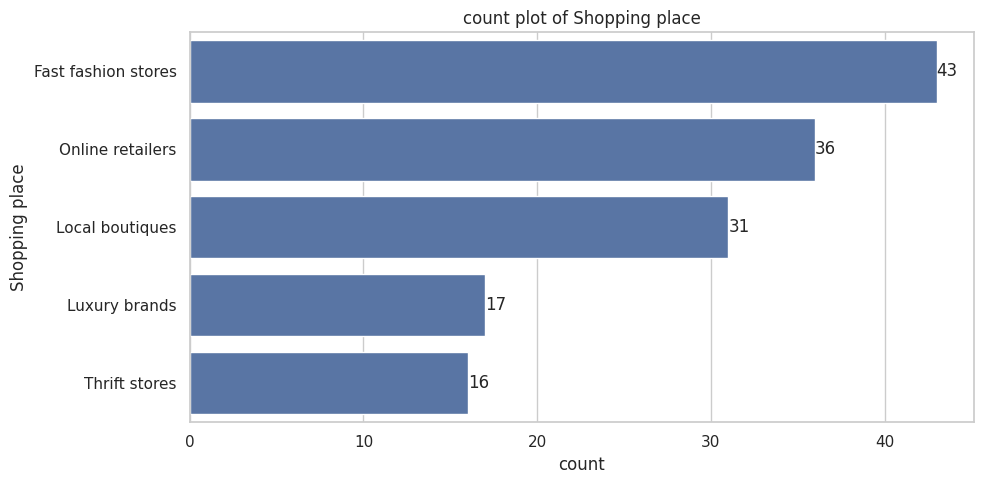

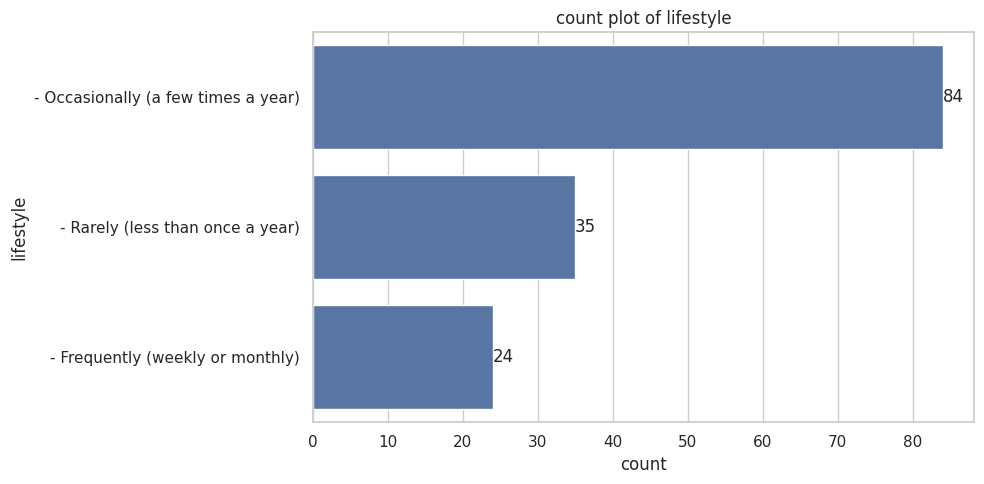

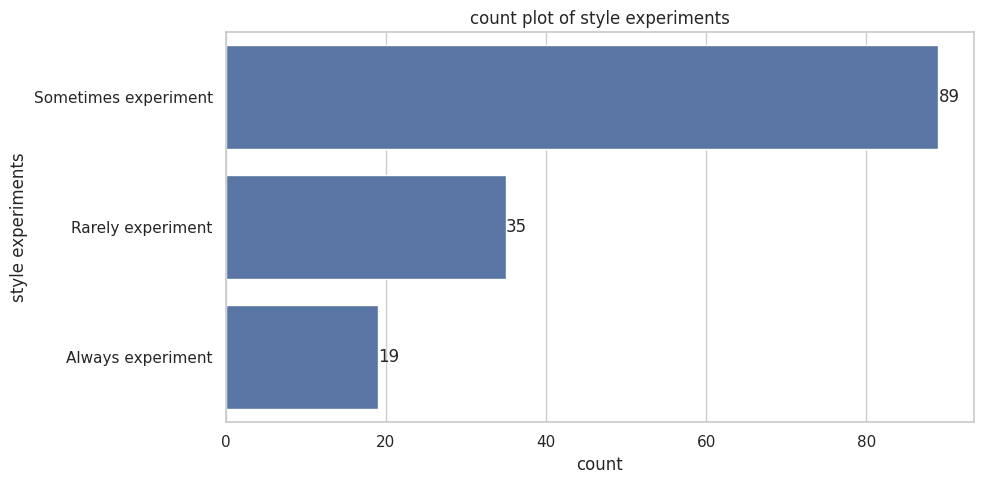

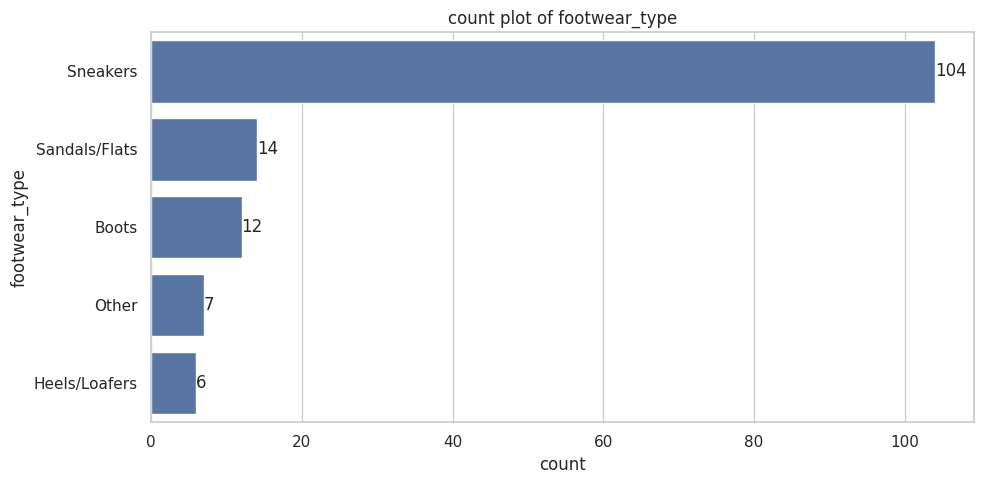

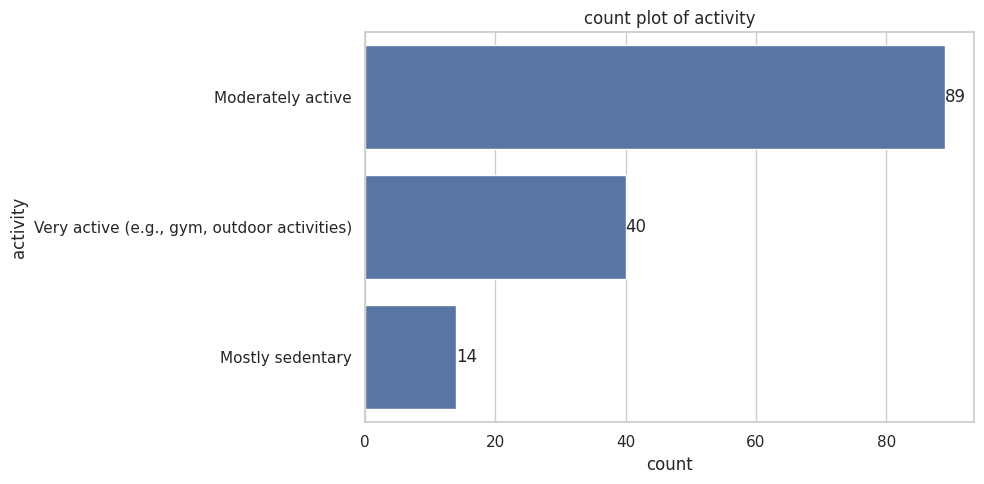

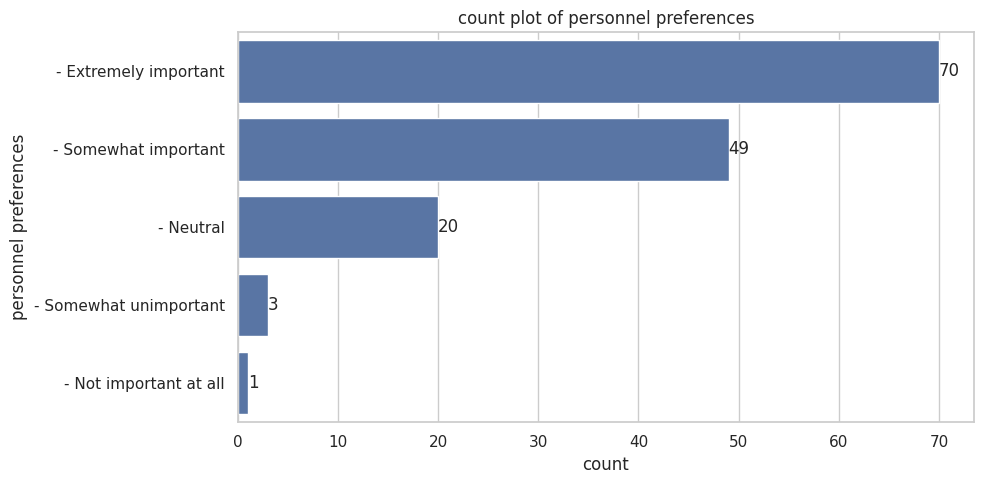

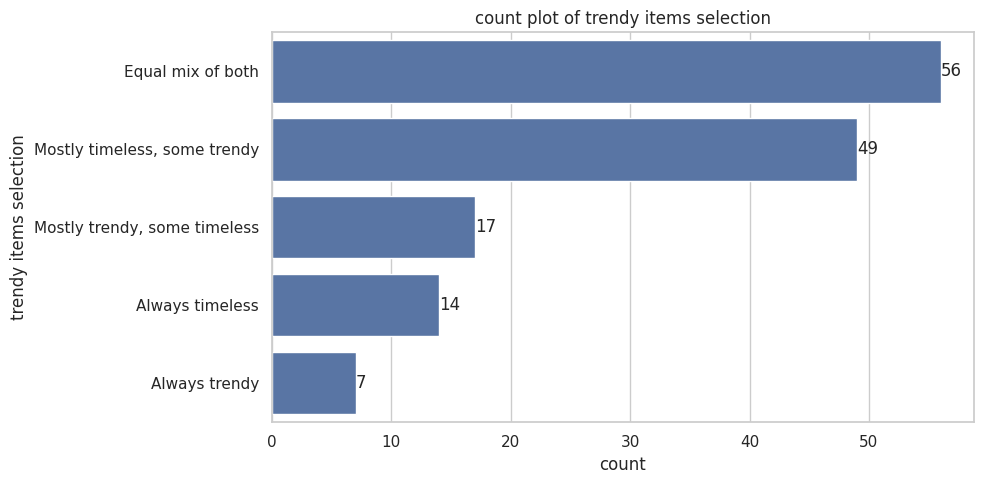

In [96]:
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

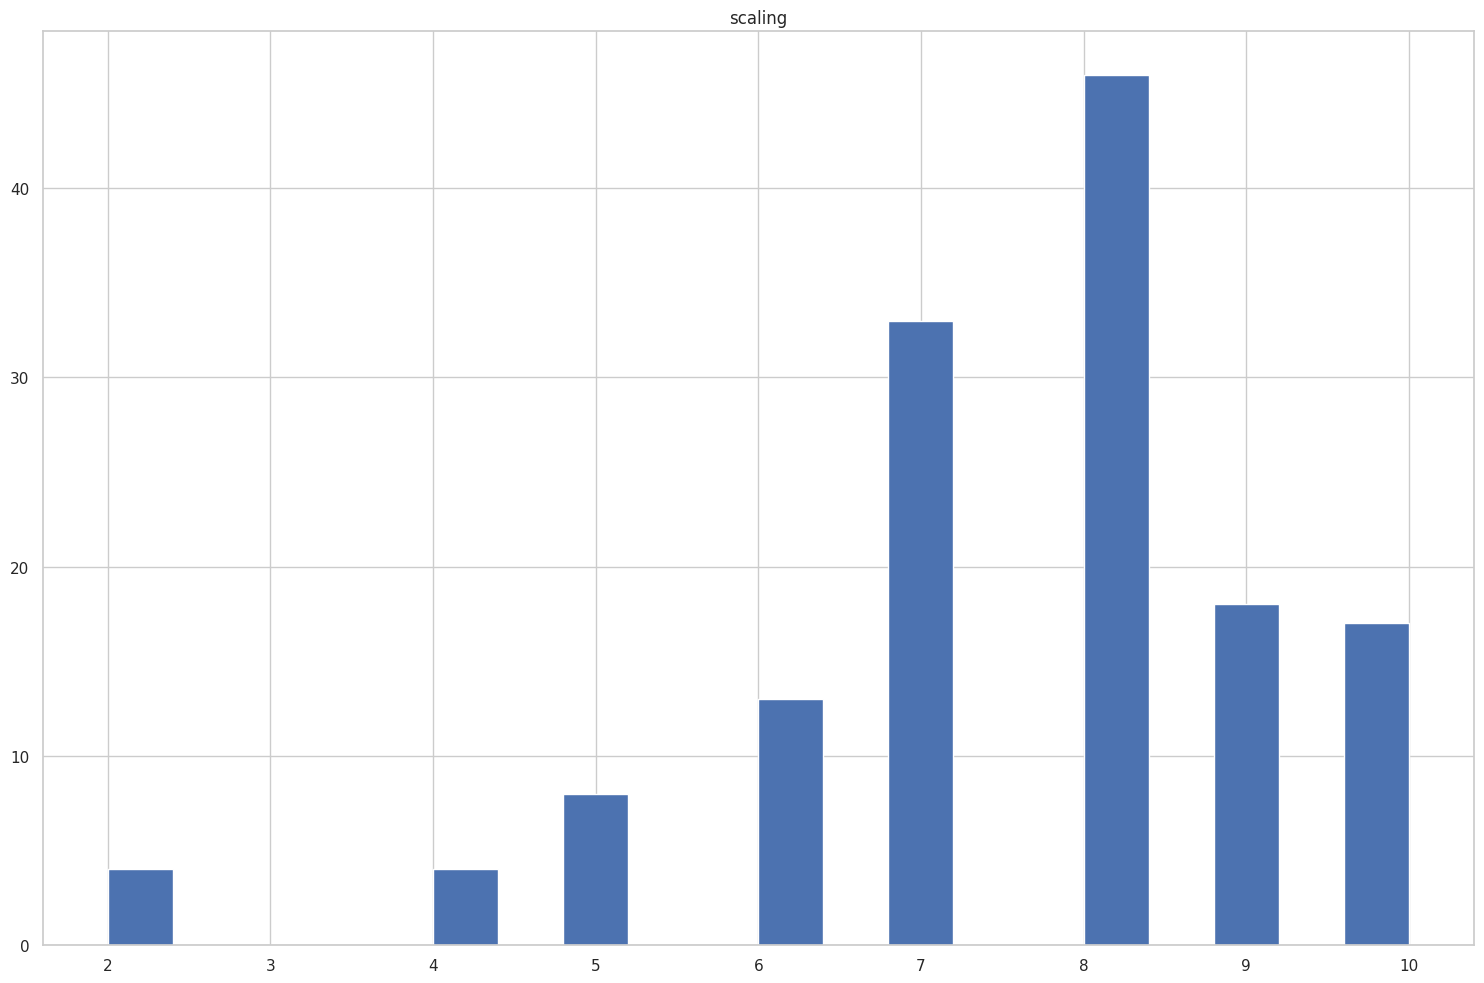

In [97]:
if numerical.shape[1]>0:
  numerical.hist(figsize = (15,10),bins = 20)
  plt.tight_layout()
  plt.show()


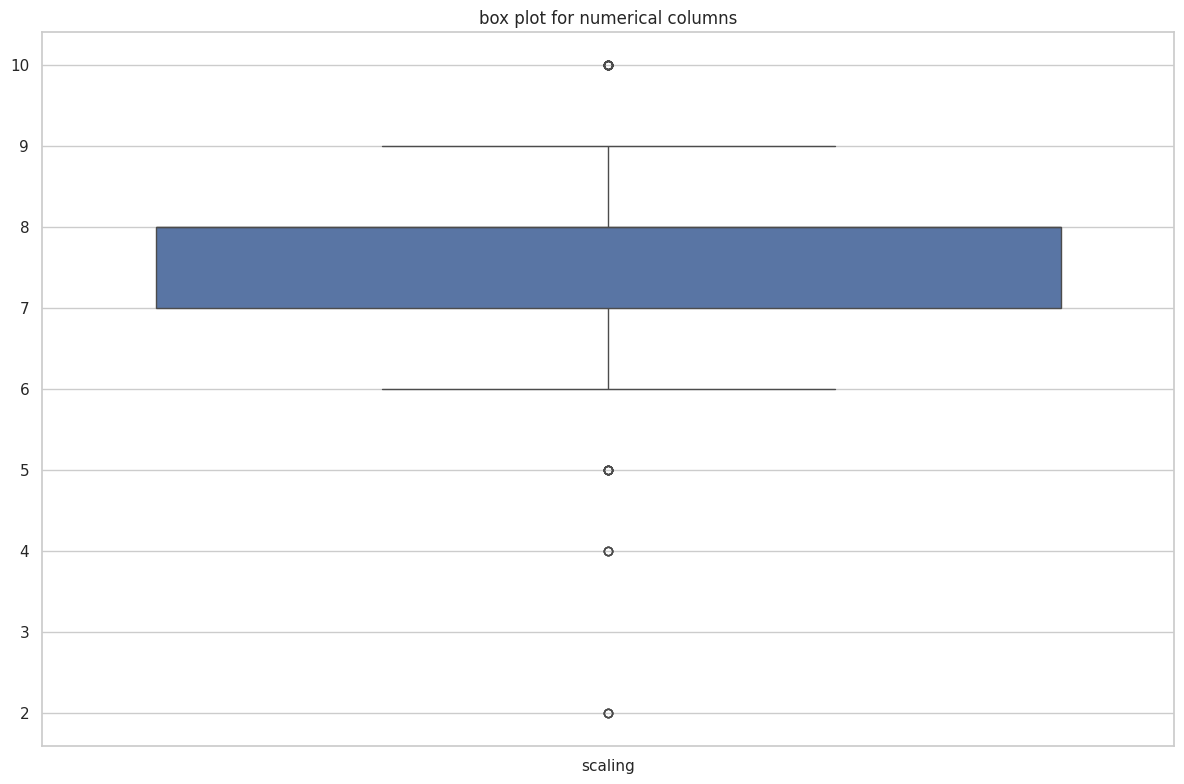

In [98]:
if numerical.shape[1]>0:
  plt.figure(figsize= (12,8))
  sns.boxplot(data = numerical)
  plt.title("box plot for numerical columns")
  plt.tight_layout()
  plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               143 non-null    datetime64[ns]
 1   Age Group               143 non-null    object        
 2   Gender                  143 non-null    object        
 3   Profession              143 non-null    object        
 4   Style Preferences       143 non-null    object        
 5   Favourite colour        143 non-null    object        
 6   priority                143 non-null    object        
 7   wardrobe description    143 non-null    object        
 8   shopping habits         143 non-null    object        
 9   influence               143 non-null    object        
 10  Shopping place          143 non-null    object        
 11  lifestyle               143 non-null    object        
 12  style experiments       143 non-null    object        


In [101]:
target_column = 'scaling'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")

In [104]:
predicting_columns = ['Age Group','Gender','Profession']

In [105]:
for col in predicting_columns:
  if col not in df.columns:
    raise ValueError(f"Predicting column '{col}' not found in the DataFrame.")

In [106]:
df_model = df[predicting_columns + [target_column]]

In [107]:
df_model.head()

,Age Group,Gender,Profession,scaling
0,18–24,Female,Student,8.0
1,18–24,Female,Student,6.0
2,18–24,Female,Student,9.0
3,18–24,Male,Student,6.0
4,18–24,Male,Student,6.0


In [108]:
df_model = pd.get_dummies(df_model, drop_first = True)

In [109]:
df_model.head()

,scaling,Age Group_25–34,Age Group_35–44,Age Group_Under 18,Gender_Male,Profession_Office Worker,Profession_Other,Profession_Student
0,8.0,False,False,False,False,False,False,True
1,6.0,False,False,False,False,False,False,True
2,9.0,False,False,False,False,False,False,True
3,6.0,False,False,False,True,False,False,True
4,6.0,False,False,False,True,False,False,True


In [110]:
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})

In [111]:
df_model.head()

,scaling,Age Group_25–34,Age Group_35–44,Age Group_Under 18,Gender_Male,Profession_Office Worker,Profession_Other,Profession_Student
0,8.0,0,0,0,0,0,0,1
1,6.0,0,0,0,0,0,0,1
2,9.0,0,0,0,0,0,0,1
3,6.0,0,0,0,1,0,0,1
4,6.0,0,0,0,1,0,0,1


In [112]:
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]

In [113]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [114]:
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred = clf.predict(X_test)

In [116]:
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')

Accuracy of the model is 0.3793103448275862


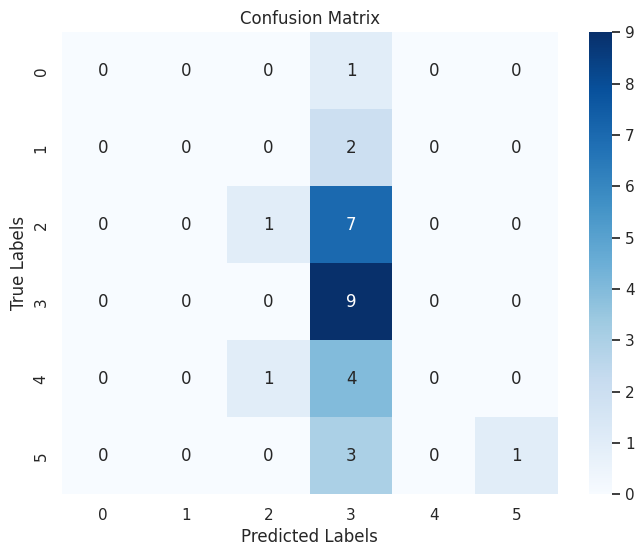

In [117]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

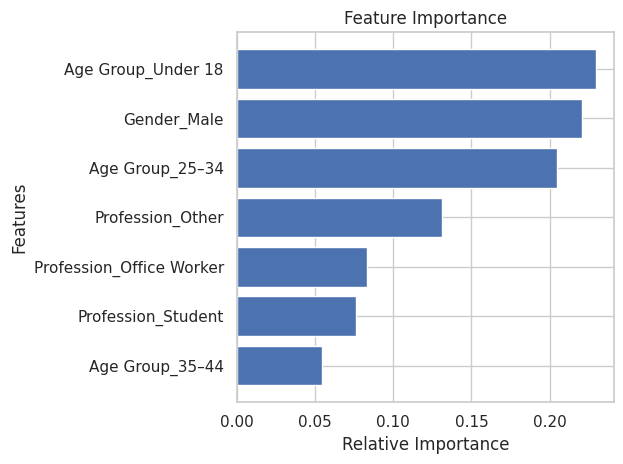

In [118]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Accuracy of the model is 0.27586206896551724


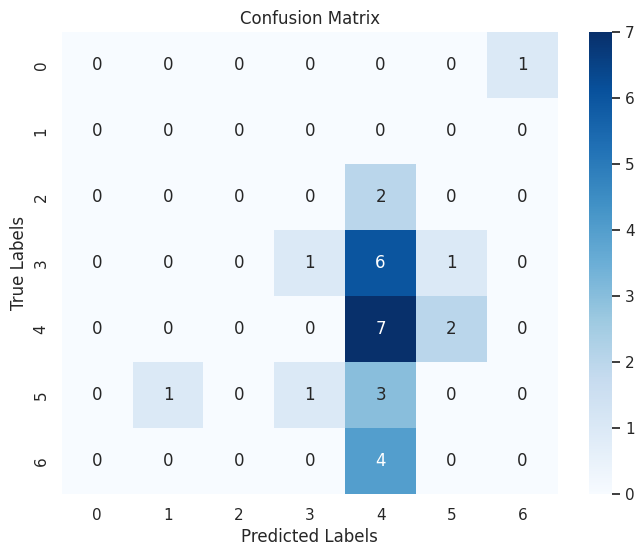

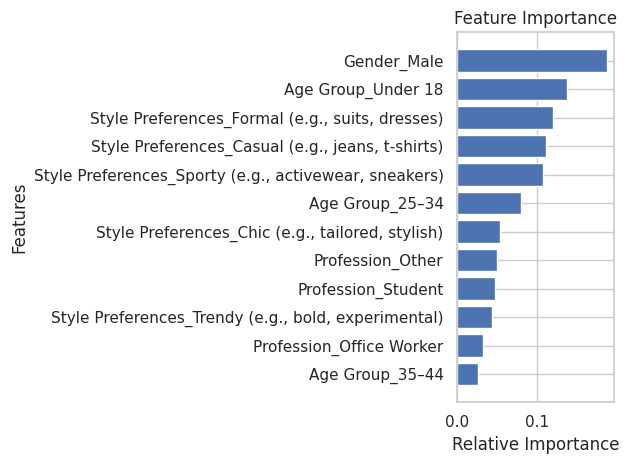

In [120]:
predicting_columns = ['Age Group','Gender','Profession', 'Style Preferences']
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()




In [121]:
df.columns

Index(['Timestamp', 'Age Group', 'Gender', 'Profession', 'Style Preferences',
       'Favourite colour', 'priority', 'wardrobe description',
       'shopping habits', 'influence', 'Shopping place', 'lifestyle',
       'style experiments', 'footwear_type', 'activity',
       'personnel preferences', 'trendy items selection', 'scaling'],
      dtype='object')

In [122]:
df['Favourite colour'].unique()

array(['Pastels (soft pink, baby blue)', 'Dark tones (navy, maroon)',
       'Neutral (black, white, beige)', 'Mixed or patterned',
       'Bright (yellow, red, green)'], dtype=object)

Accuracy of the model is 0.3448275862068966


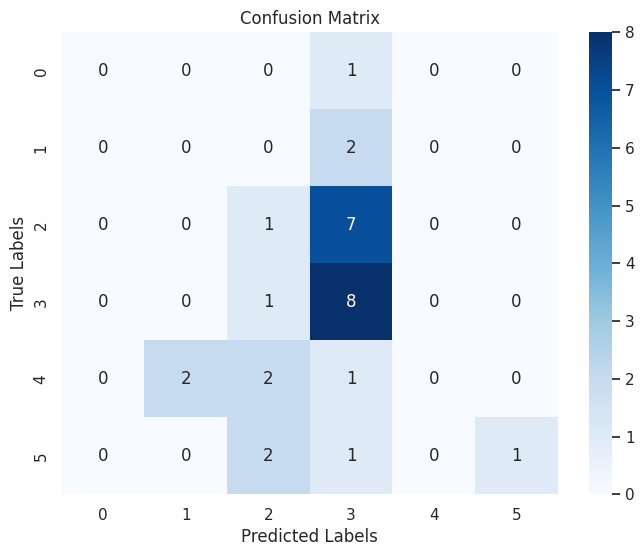

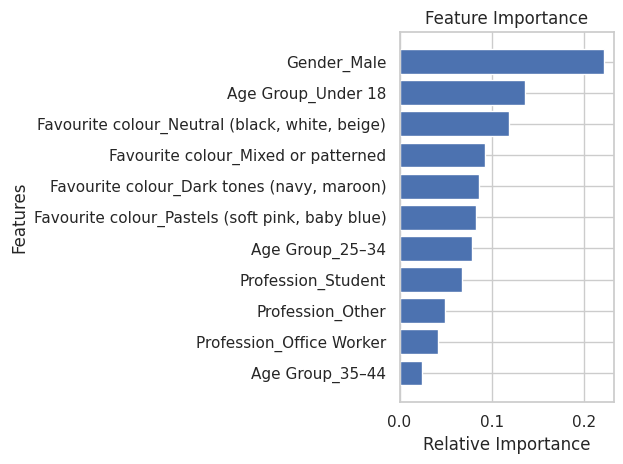

In [125]:
predicting_columns = ['Age Group','Gender','Profession', 'Favourite colour']
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()




In [127]:
df = pd.read_excel('fashion_data_2018_2022.xls')

In [128]:
df.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,0.20,2018-01-28,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0.00,2018-01-28,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,0.05,2018-01-07,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,0.10,2018-01-01,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0.00,2018-01-28,126,1,2018


In [129]:
df.isnull().sum()

,0
product_id,0
product_name,0
gender,0
category,0
pattern,0
color,0
age_group,0
season,0
price,0
material,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          660 non-null    int64         
 1   product_name        660 non-null    object        
 2   gender              660 non-null    object        
 3   category            660 non-null    object        
 4   pattern             660 non-null    object        
 5   color               660 non-null    object        
 6   age_group           660 non-null    object        
 7   season              660 non-null    object        
 8   price               660 non-null    float64       
 9   material            660 non-null    object        
 10  sales_count         660 non-null    int64         
 11  reviews_count       660 non-null    int64         
 12  average_rating      660 non-null    float64       
 13  out_of_stock_times  660 non-null    int64         

In [133]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(exclude = ['object', 'datetime64[ns]'])

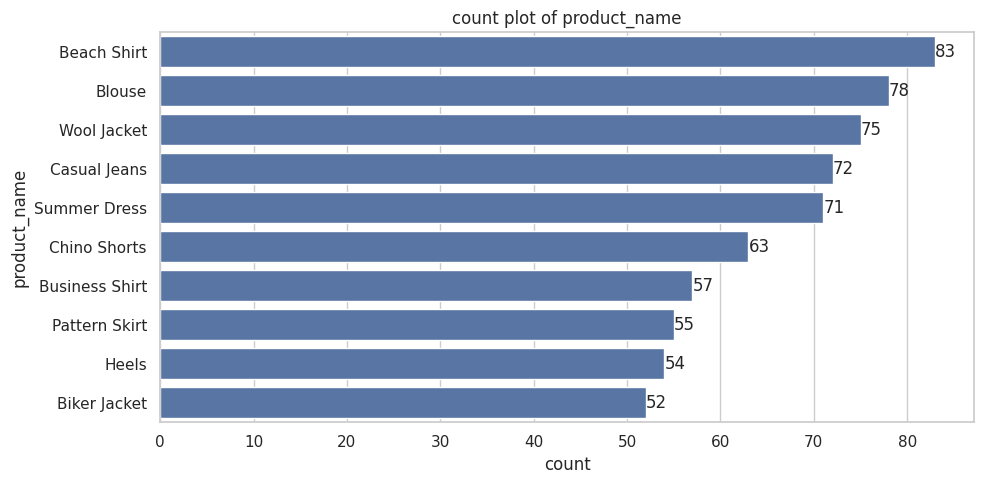

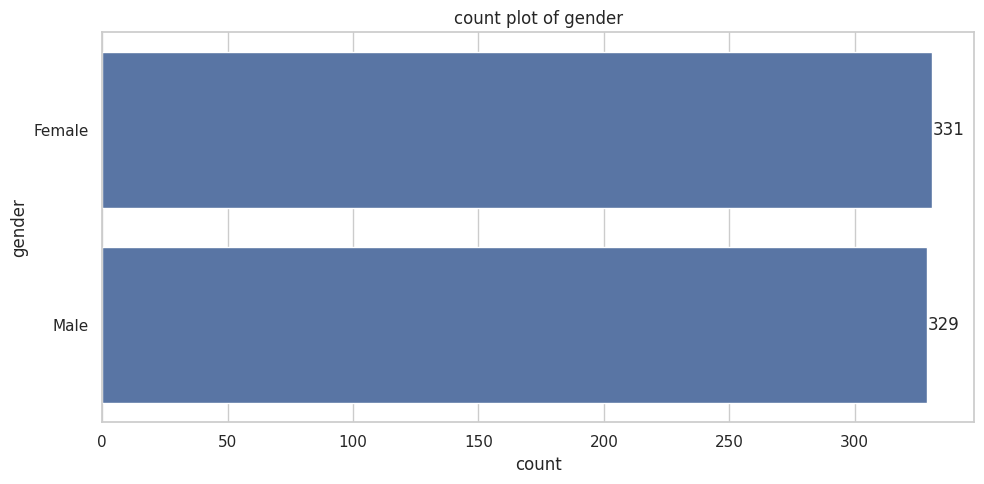

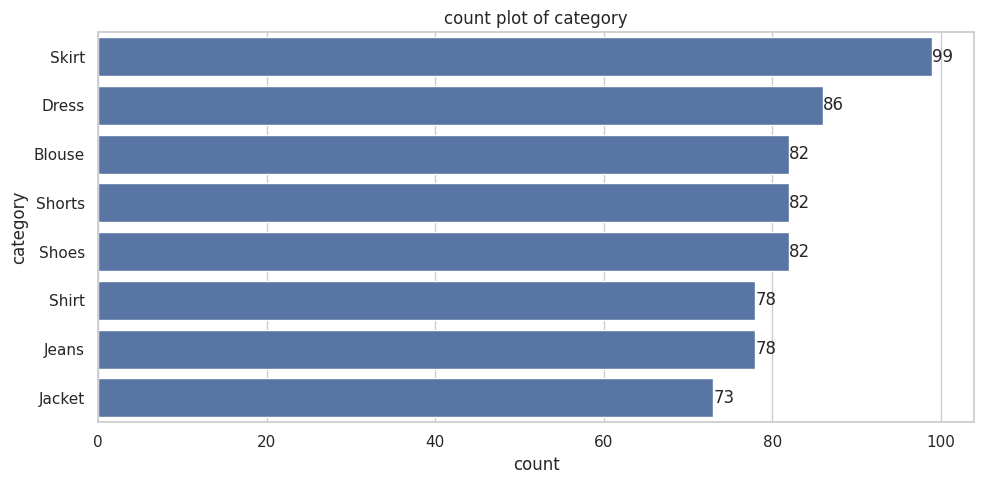

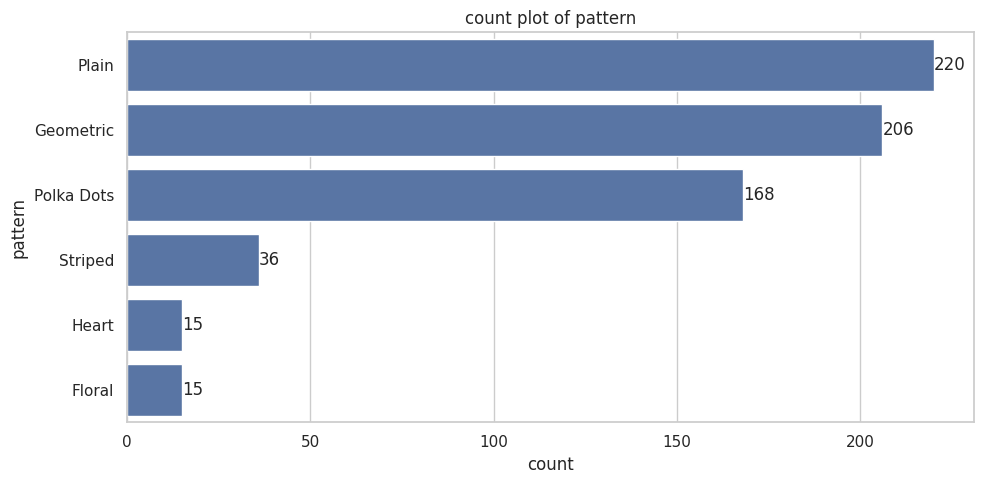

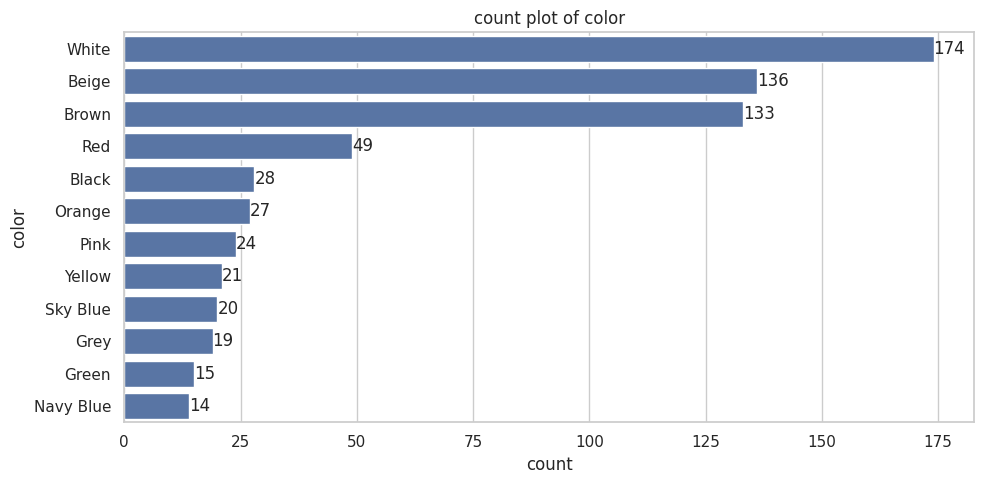

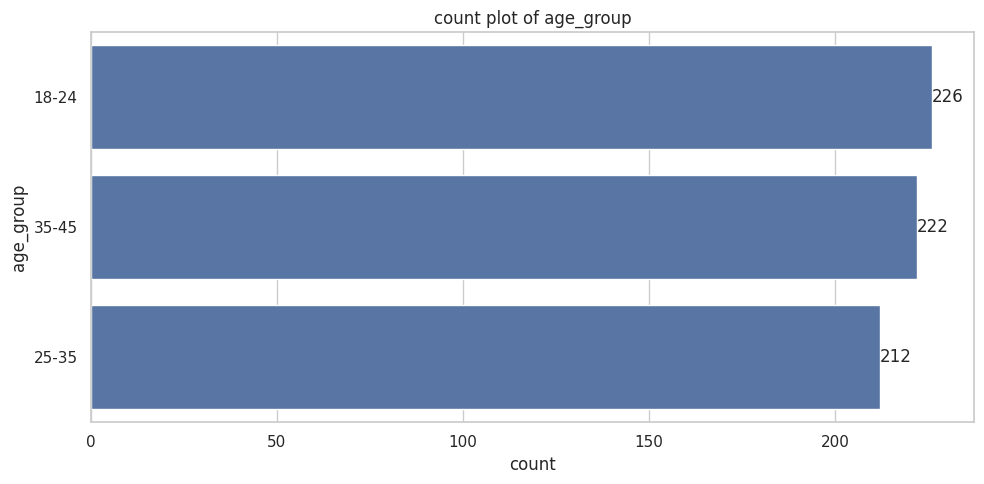

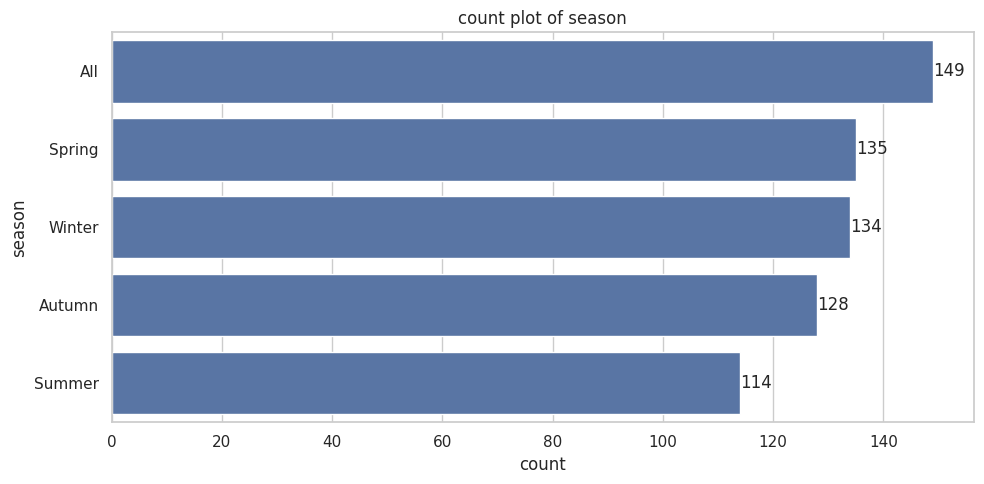

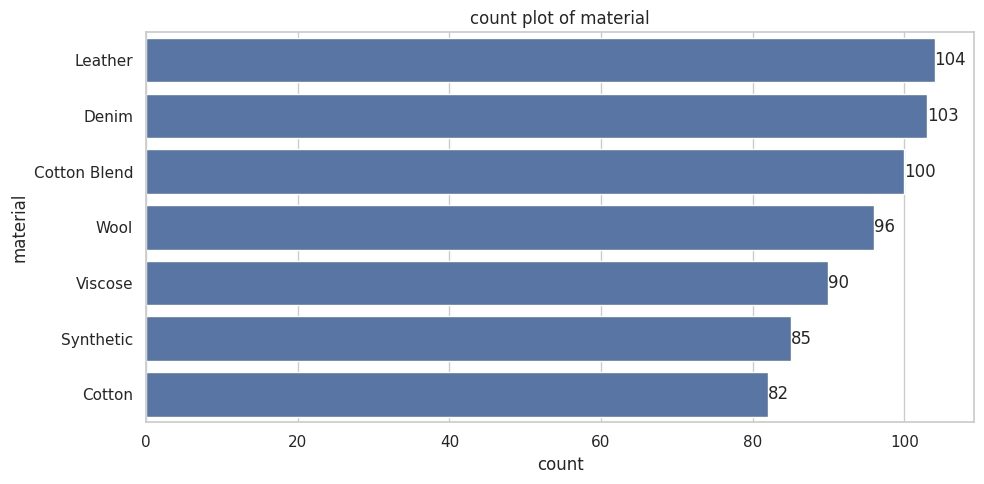

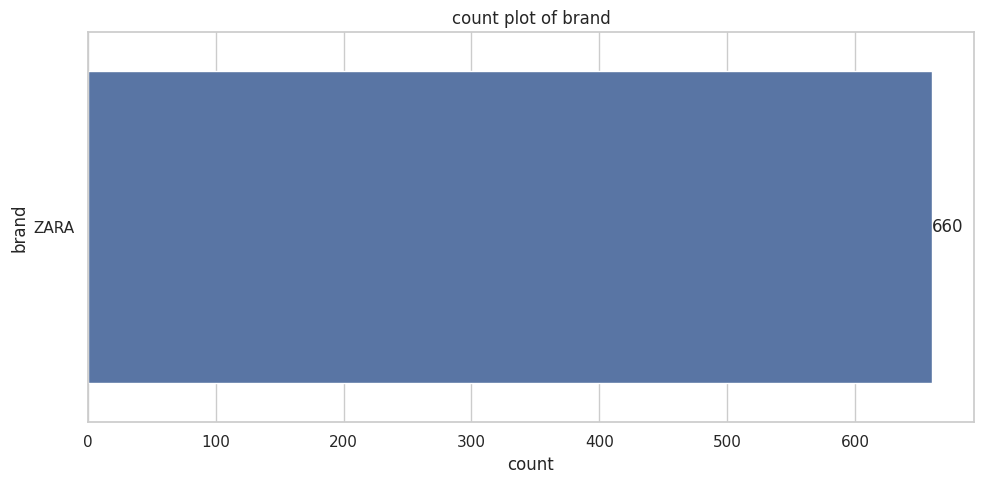

In [135]:
# plot the count plot for categorical columns
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

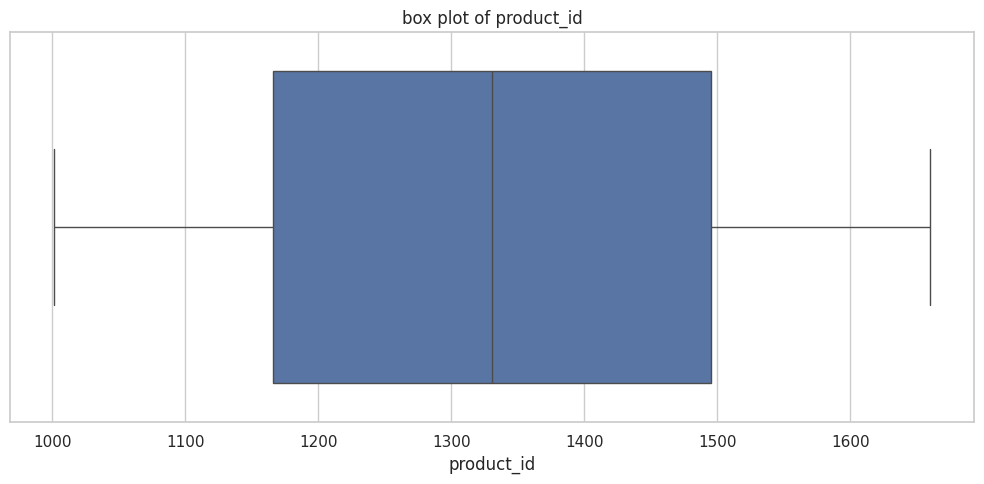

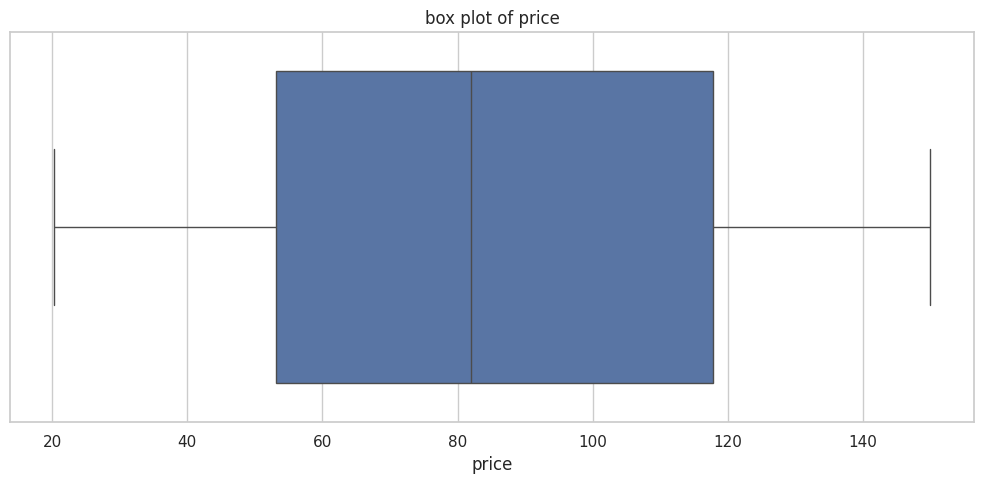

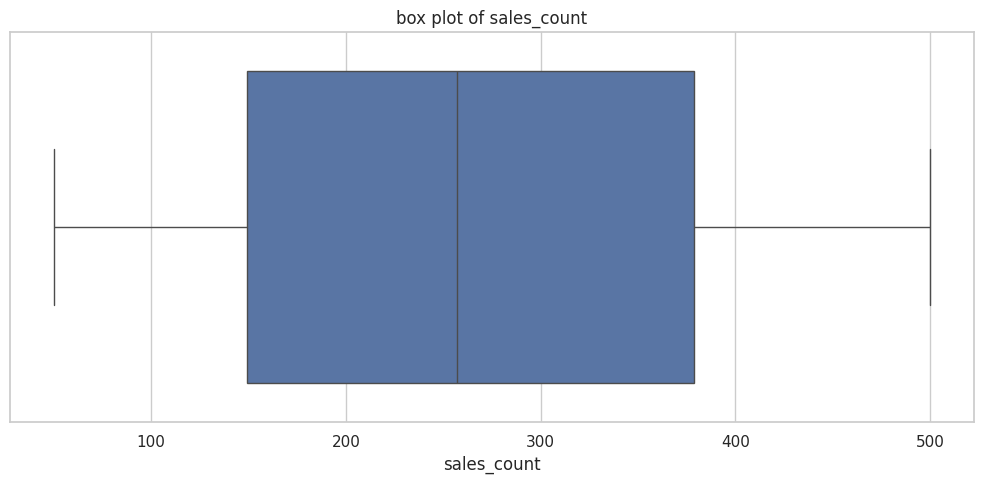

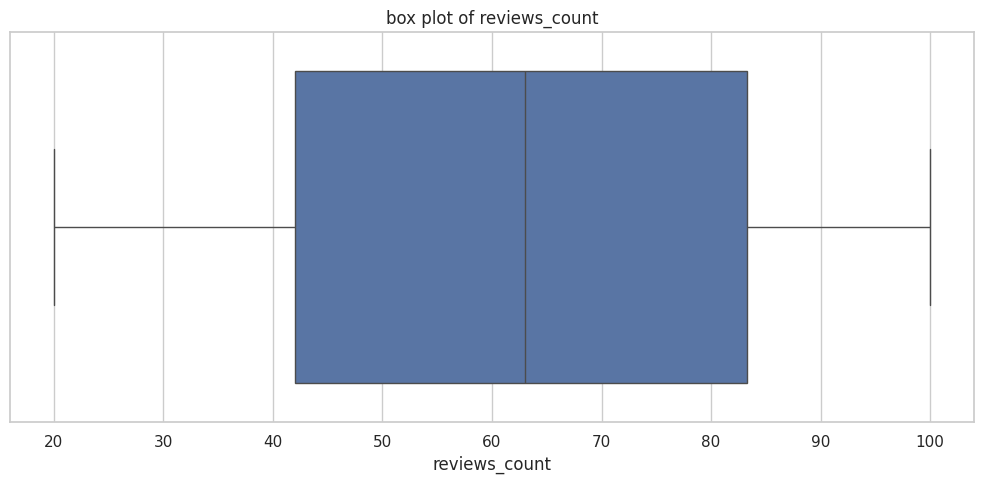

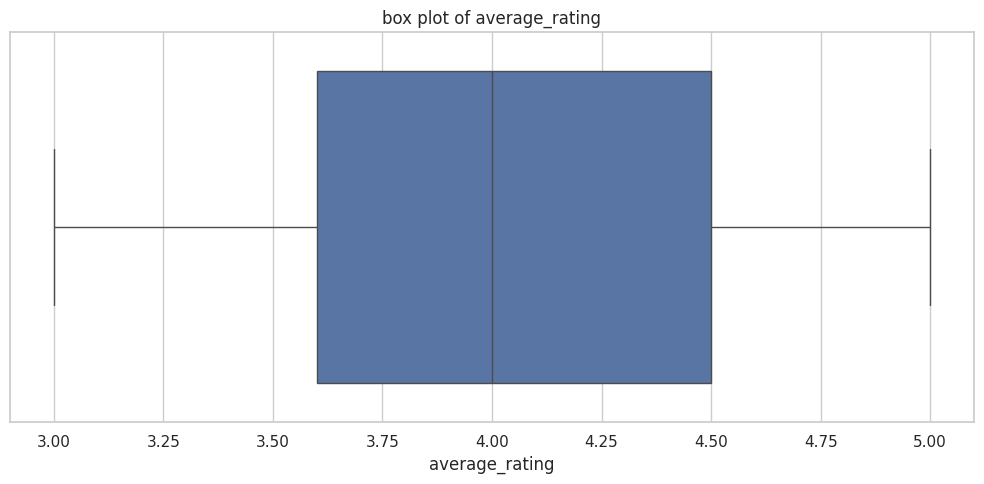

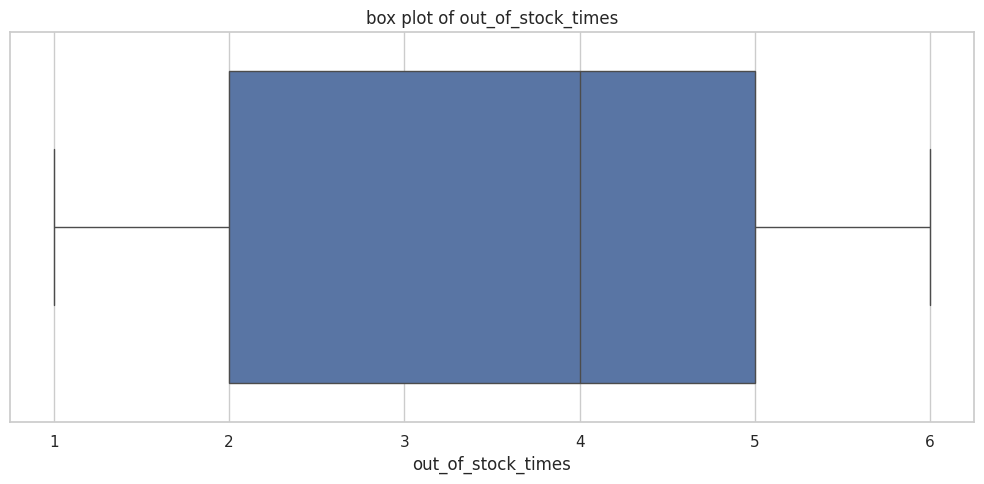

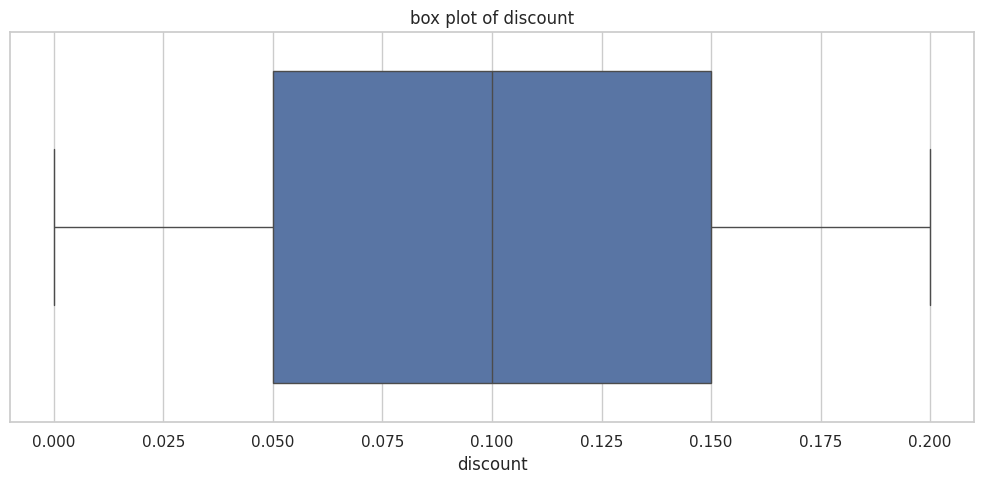

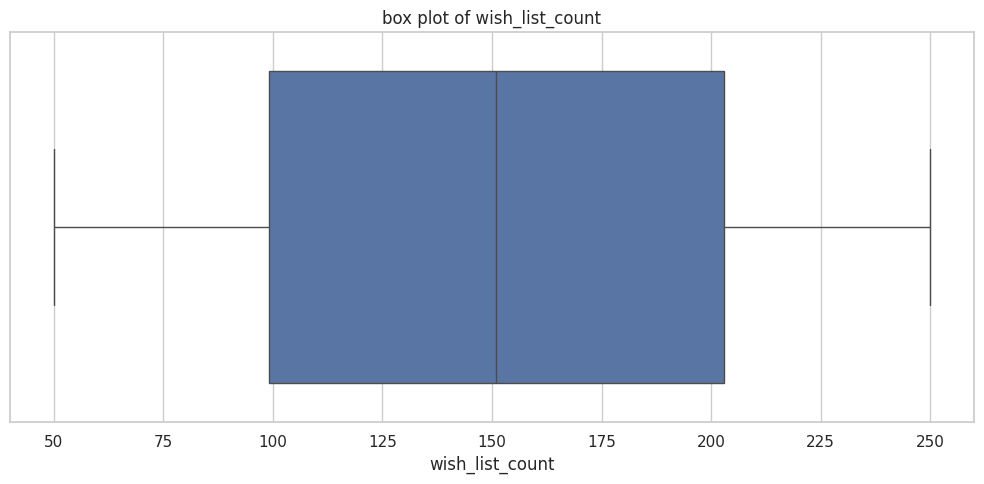

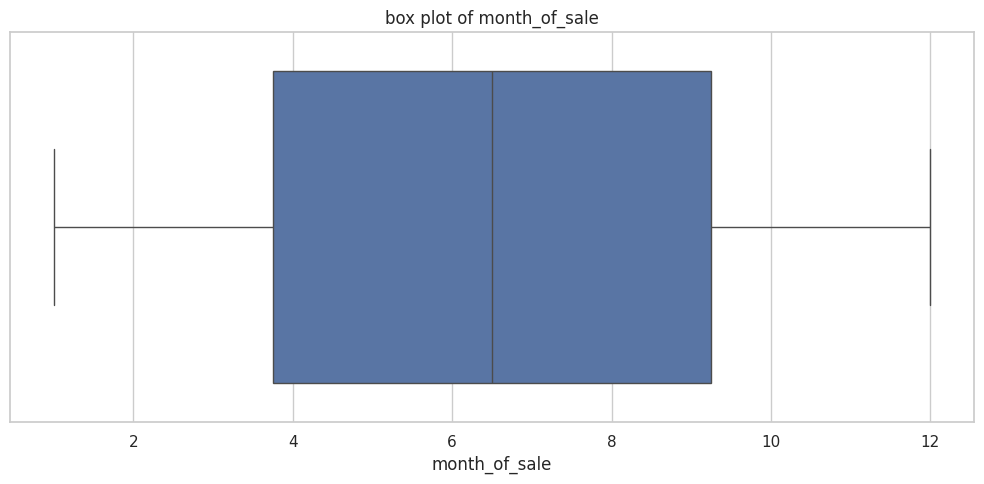

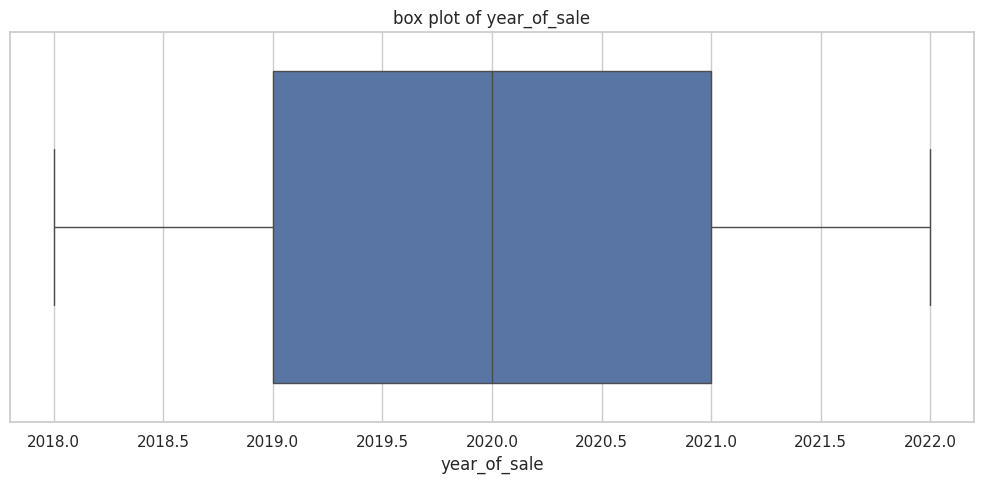

In [136]:
#boxplot for numerical columns
for col in numerical:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = df[col])
  plt.title(f'box plot of {col}')
  plt.tight_layout()
  plt.show()


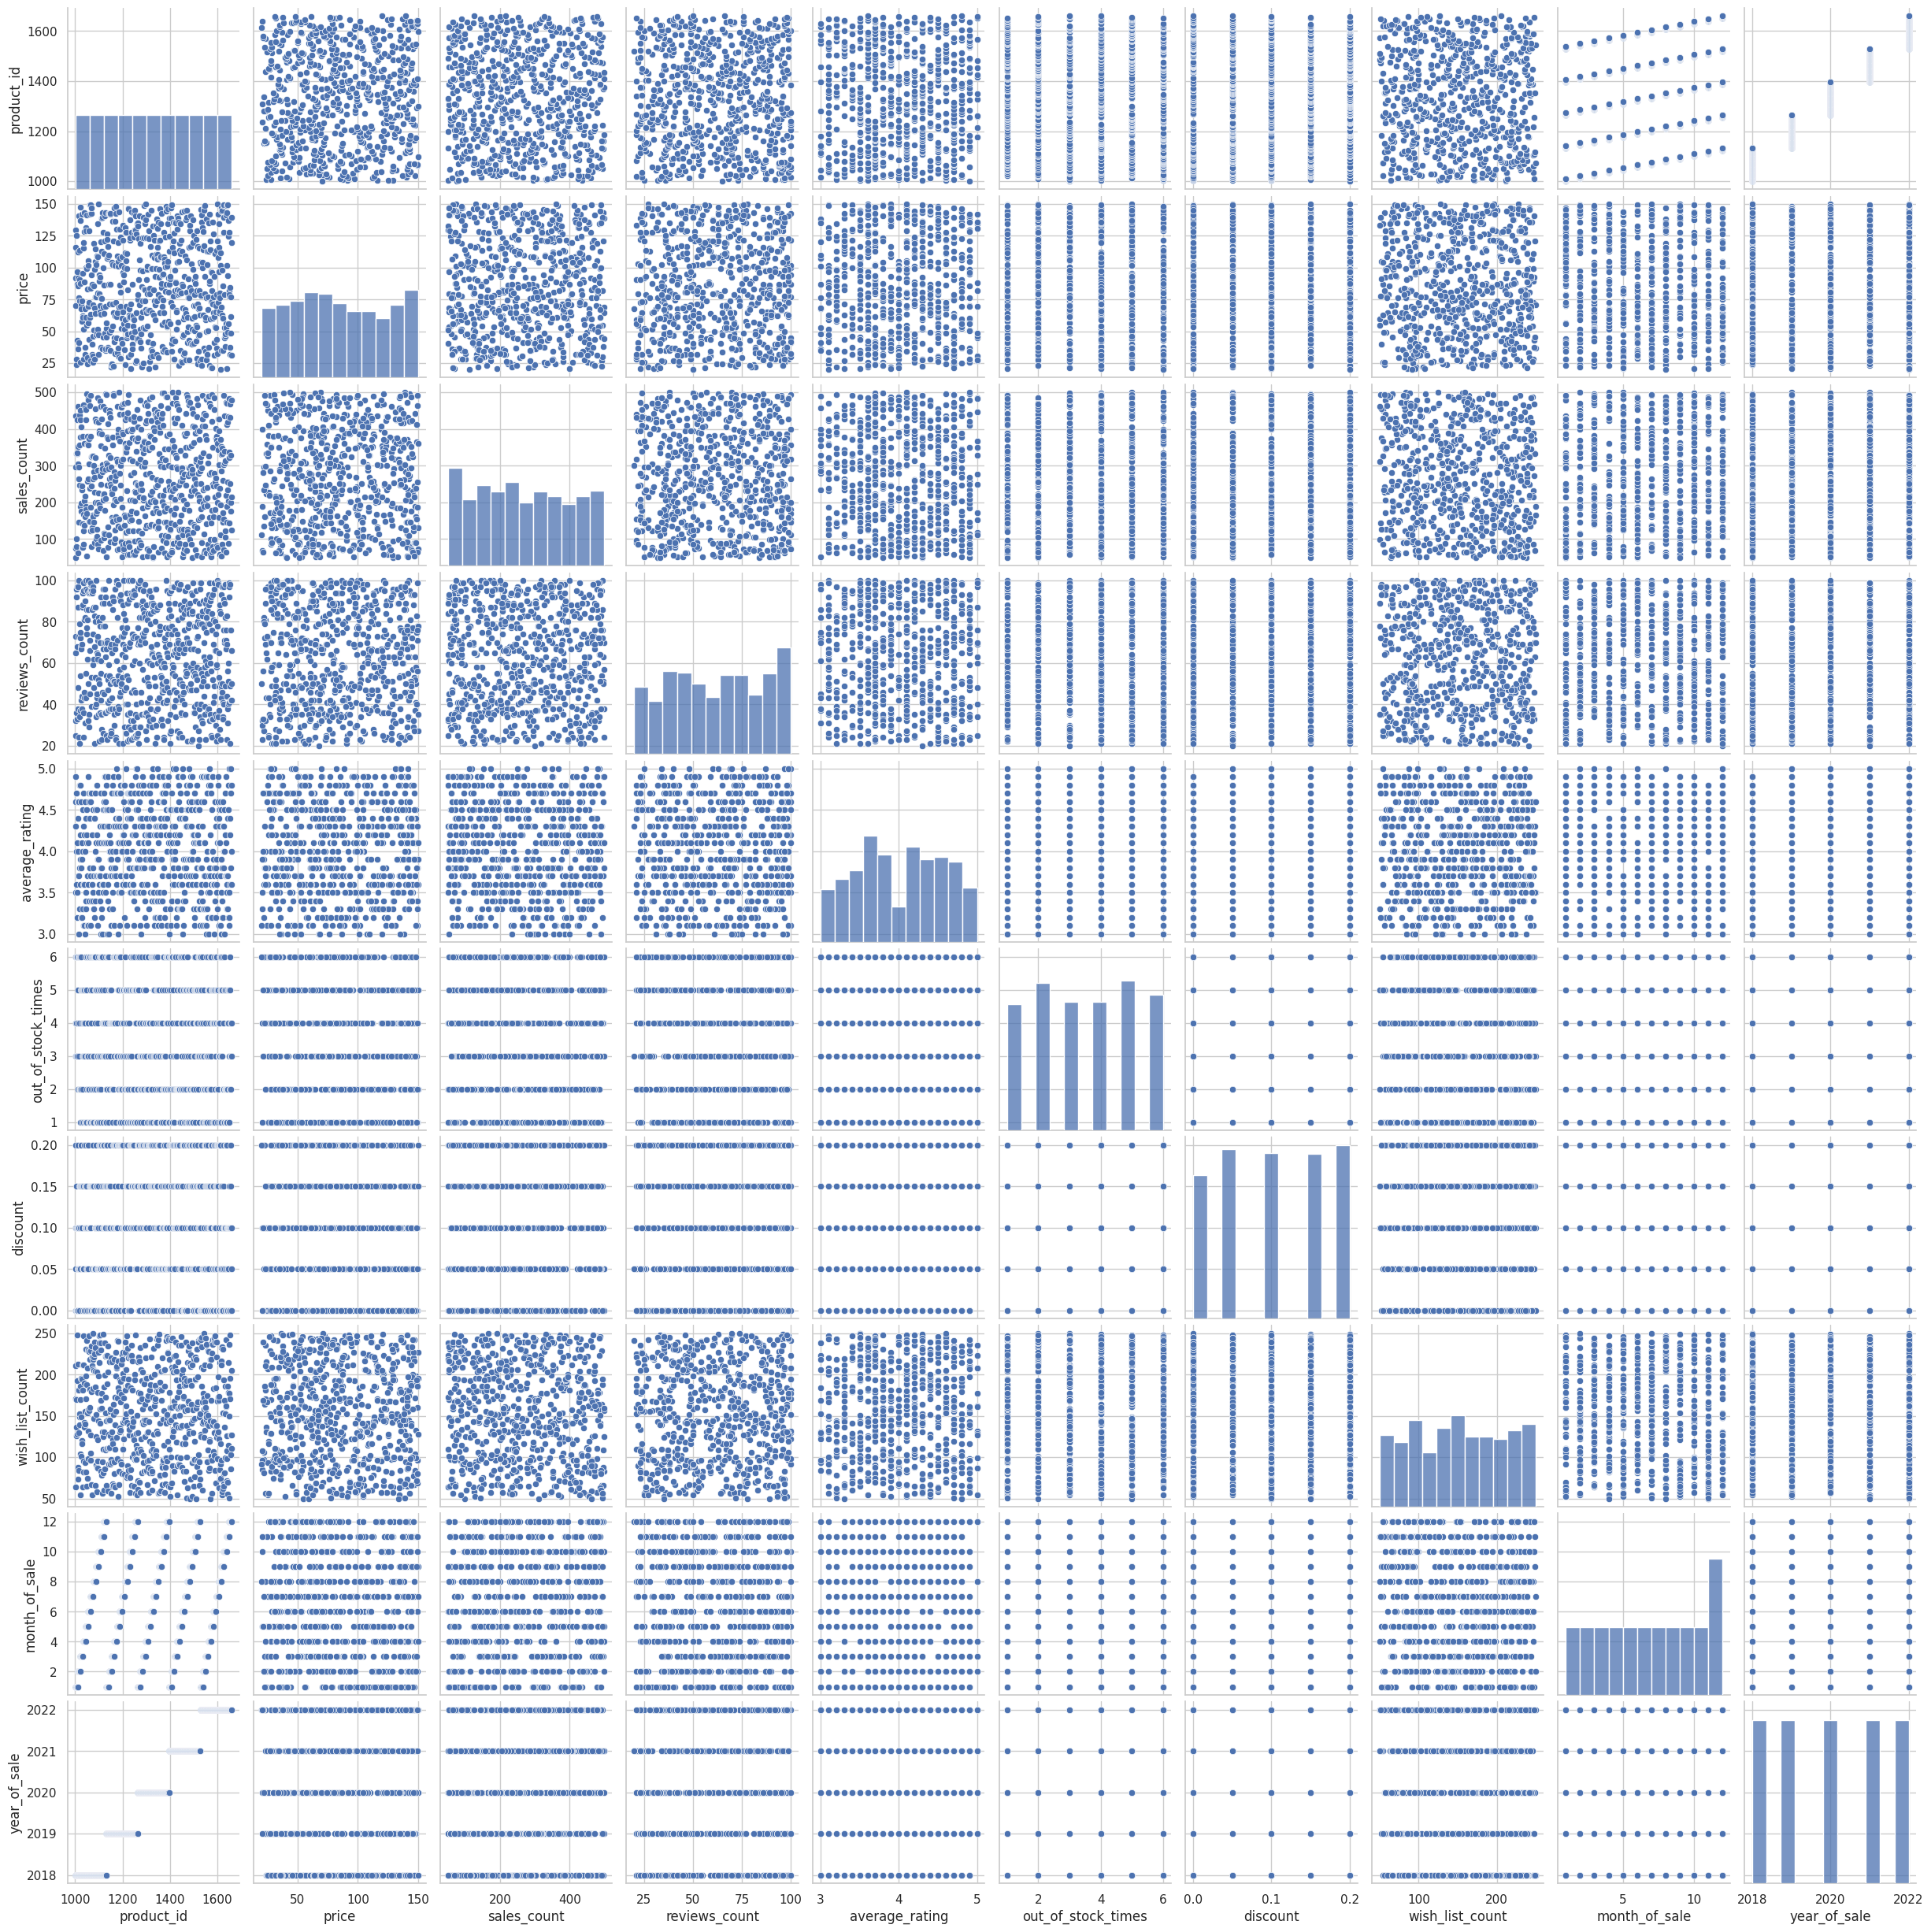

In [137]:
#pair plot for numerical columns
sns.pairplot(numerical)
plt.show()

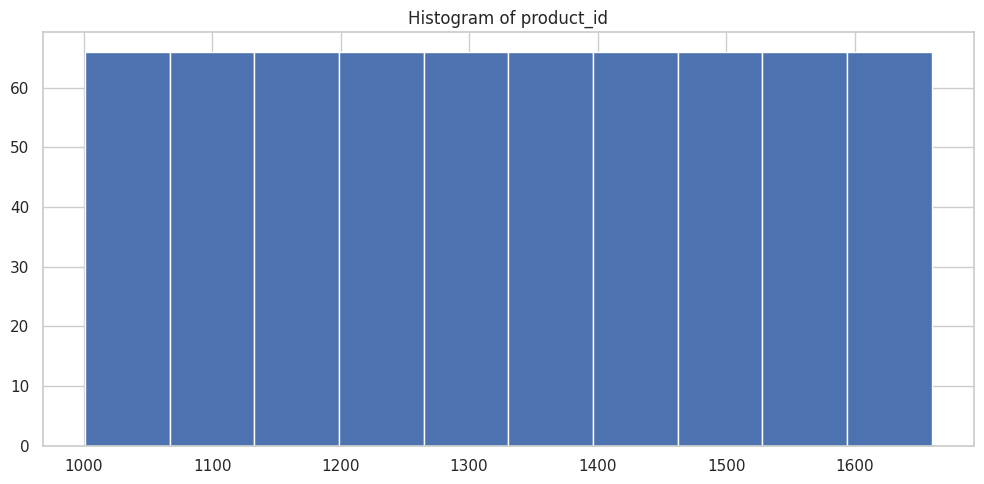

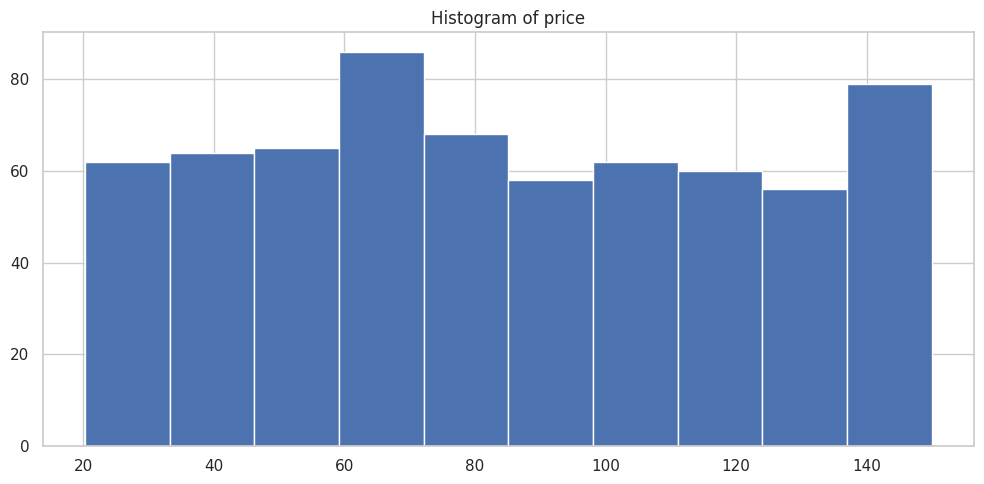

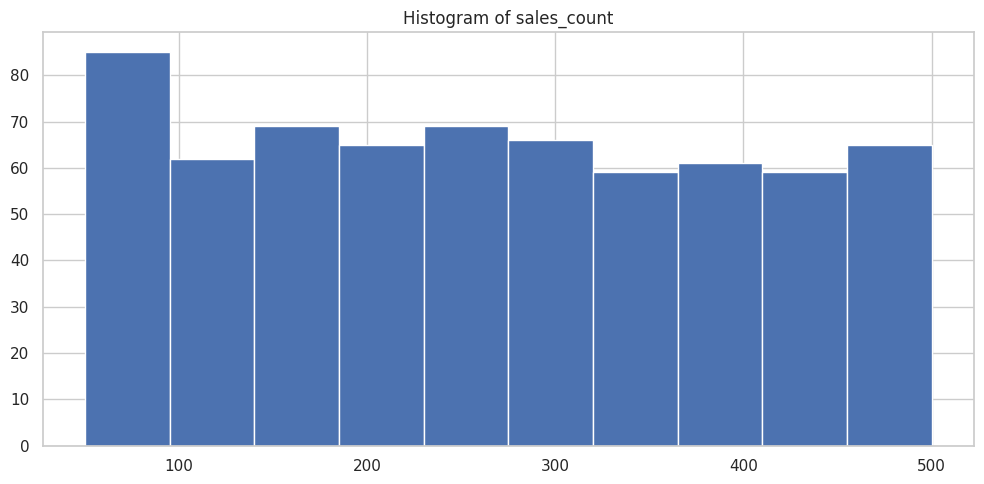

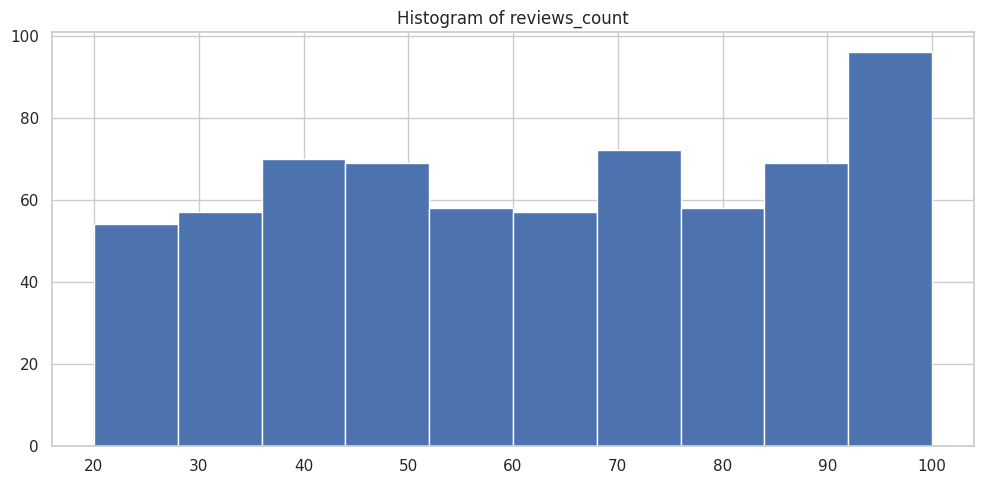

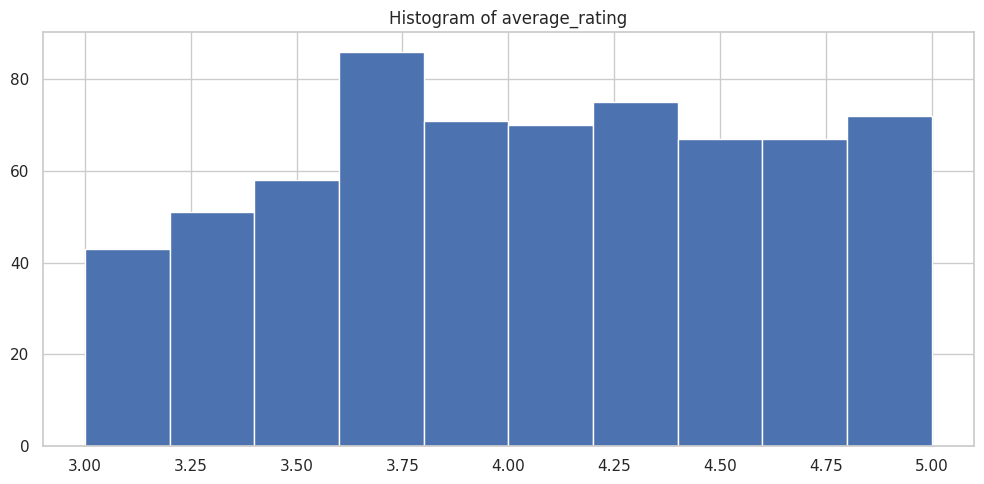

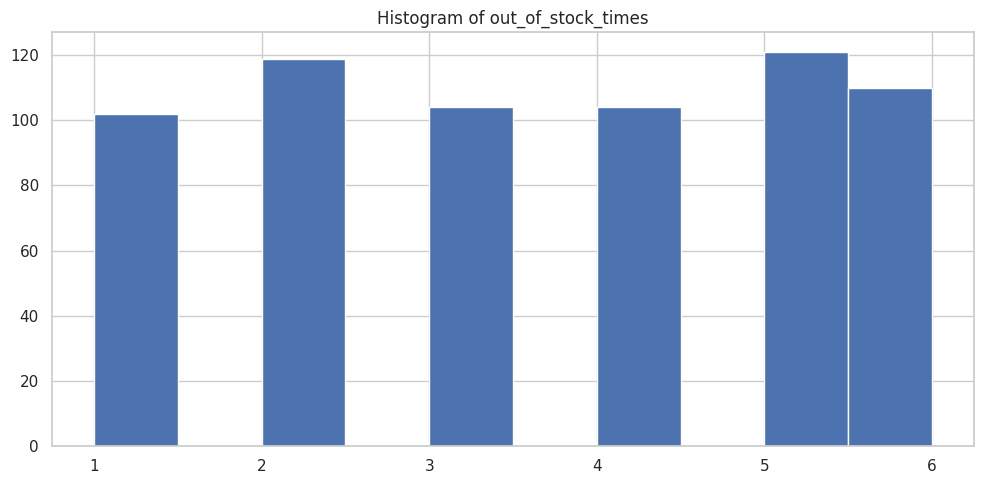

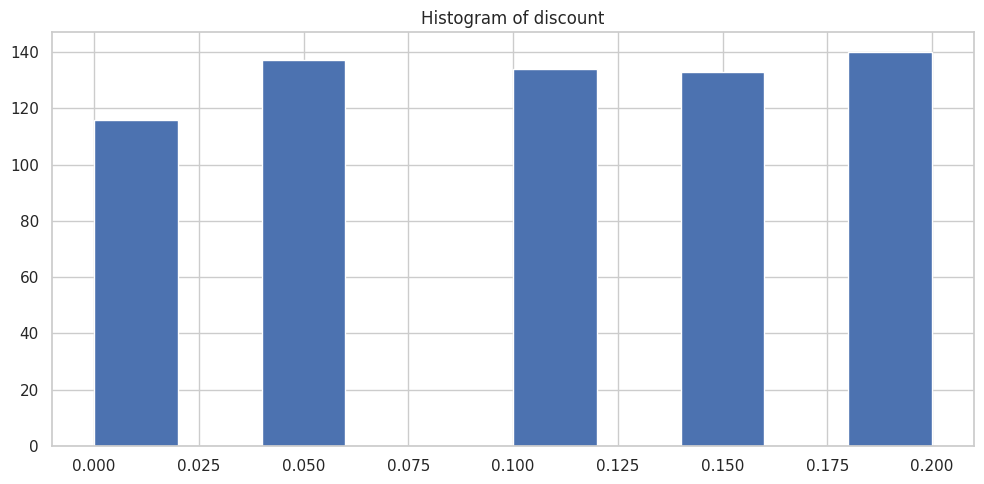

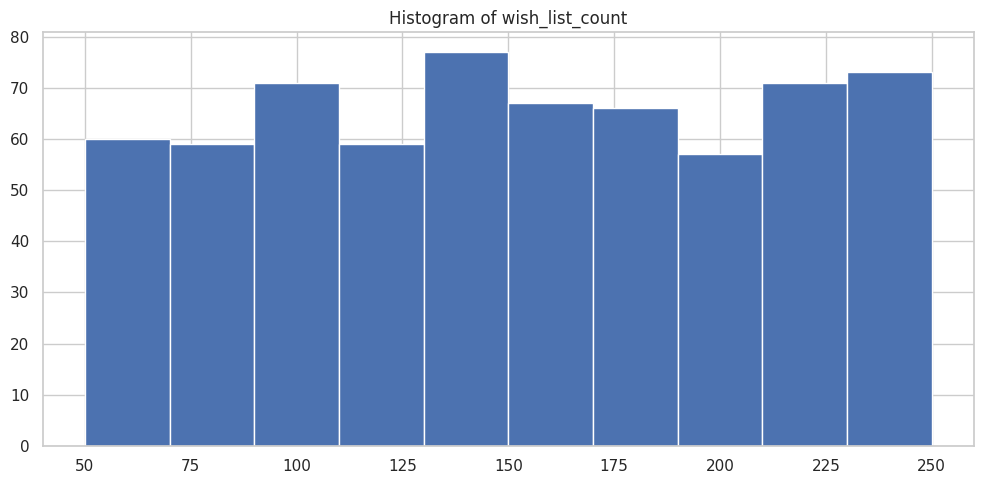

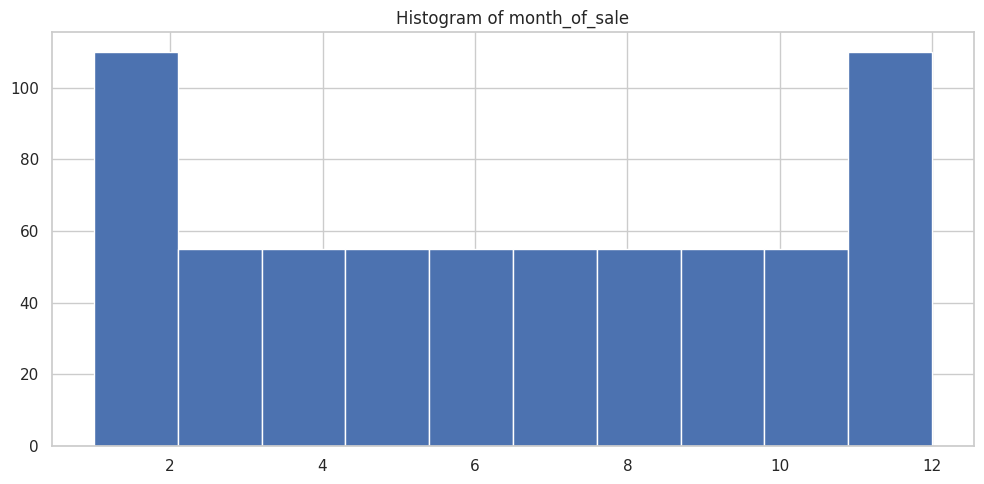

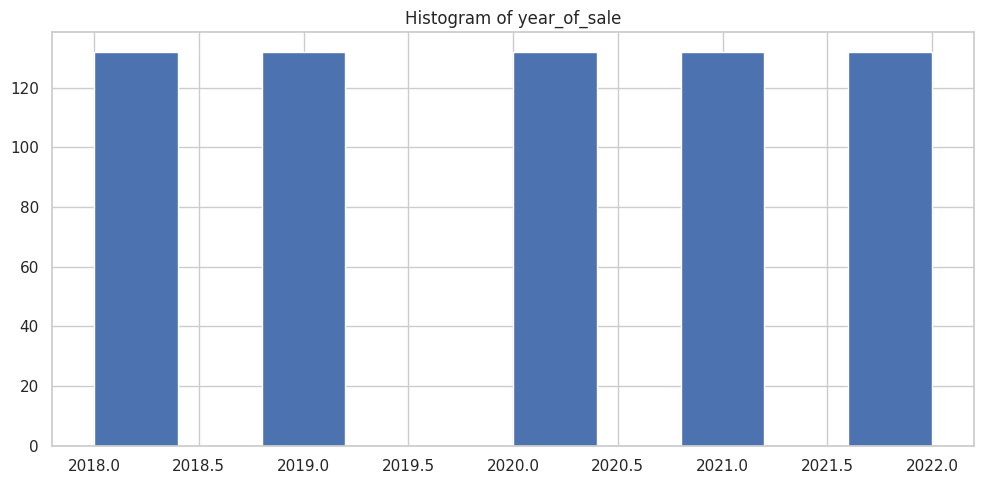

In [138]:
#histograms for the numerical data
for col in numerical:
  plt.figure(figsize = (10,5))
  df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.tight_layout()
  plt.show()

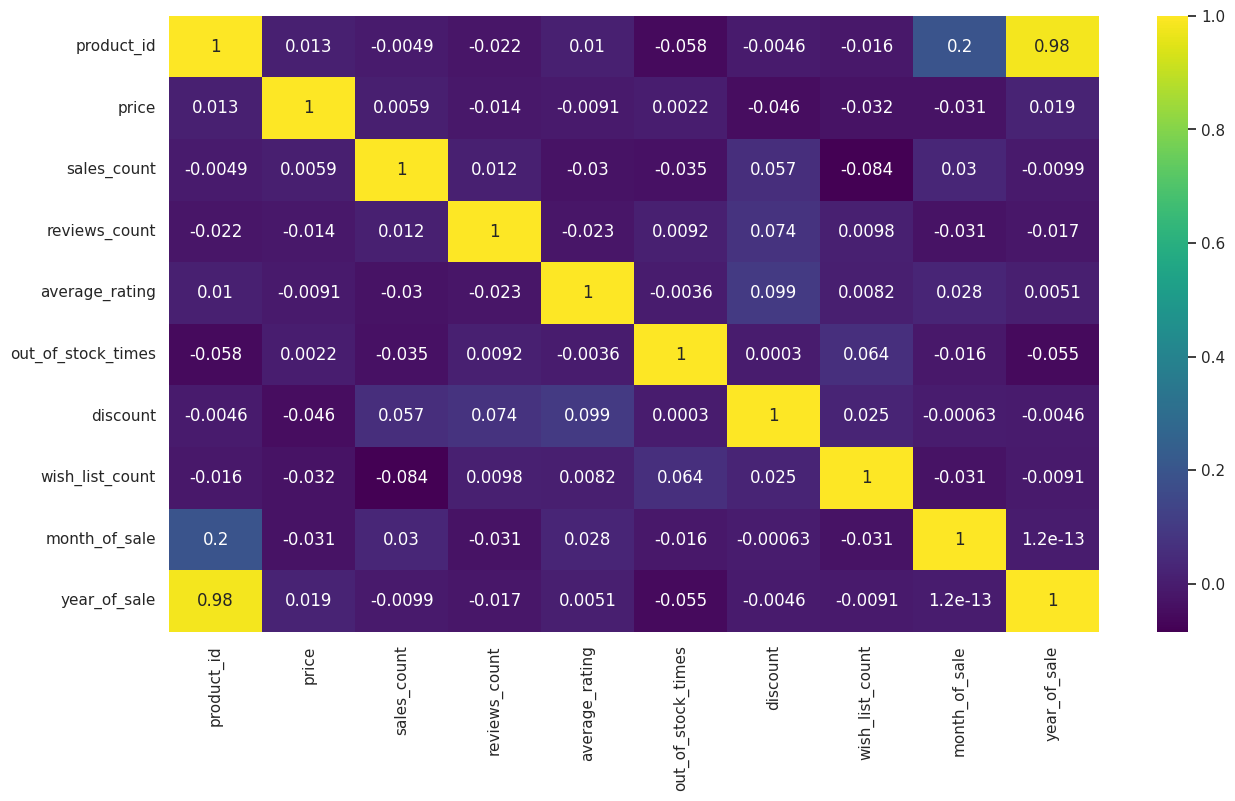

In [140]:
#heatmap for numerical columns
plt.figure(figsize = (15,8))
sns.heatmap(numerical.corr(), annot = True, cmap = 'viridis')
plt.show()

In [141]:
df.columns

Index(['product_id', 'product_name', 'gender', 'category', 'pattern', 'color',
       'age_group', 'season', 'price', 'material', 'sales_count',
       'reviews_count', 'average_rating', 'out_of_stock_times', 'brand',
       'discount', 'last_stock_date', 'wish_list_count', 'month_of_sale',
       'year_of_sale'],
      dtype='object')

In [142]:
y= df['sales_count']
X = df.drop('sales_count', axis = 1)

In [143]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [144]:
df.shape

(660, 20)

In [145]:
X_train.shape

(528, 19)

In [ ]:
# using clustering algorithm
from sklearn.cluster import KMeans
